In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
# Load the full MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Filter for only 0s and 1s
train_filter = (y_train == 0) | (y_train == 1)
test_filter = (y_test == 0) | (y_test == 1)

x_train_filtered = x_train[train_filter]
y_train_filtered = y_train[train_filter]
x_test_filtered = x_test[test_filter]
y_test_filtered = y_test[test_filter]

print(f"Training samples: {len(x_train_filtered)}")
print(f"Test samples: {len(x_test_filtered)}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training samples: 12665
Test samples: 2115


In [10]:
print(x_train_filtered[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  124 253 255  63   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  96
  244 251 253  62   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 127
  251 251 253  62   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

In [11]:
# Convert to float and normalize to 0-1 range
x_train_normalized = x_train_filtered.astype('float32') / 255.0
x_test_normalized = x_test_filtered.astype('float32') / 255.0

# Reshape data to flatten 28x28 images into 784-dimensional vectors
x_train_flat = x_train_normalized.reshape(x_train_normalized.shape[0], -1)
x_test_flat = x_test_normalized.reshape(x_test_normalized.shape[0], -1)

print(f"Input shape: {x_train_flat.shape}")

Input shape: (12665, 784)


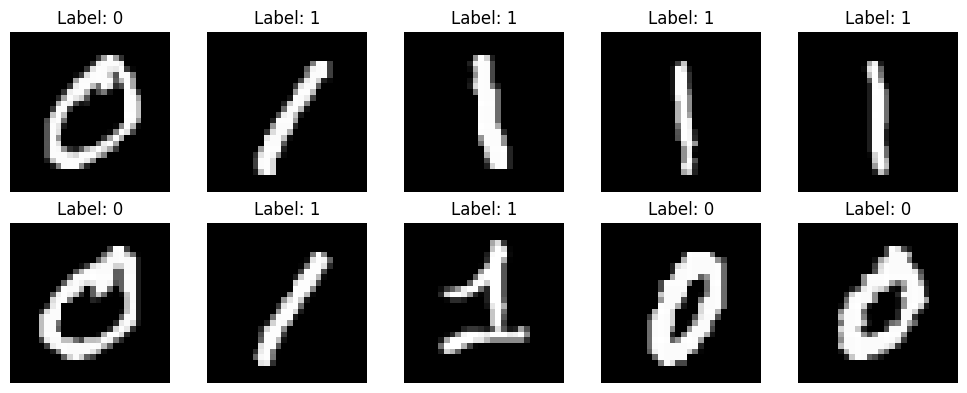

In [12]:
# Plot a few samples
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i in range(10):
    row = i // 5
    col = i % 5
    axes[row, col].imshow(x_train_filtered[i], cmap='gray')
    axes[row, col].set_title(f'Label: {y_train_filtered[i]}')
    axes[row, col].axis('off')
plt.tight_layout()
plt.show()

In [13]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(784,)),
    keras.layers.Dropout(0.2),  # Prevent overfitting
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Display model architecture
model.summary()

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 108,801 (425.00 KB)

 Trainable params: 108,801 (425.00 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # For binary classification
    metrics=['accuracy']
)

In [15]:
# Train the model
history = model.fit(
    x_train_flat, y_train_filtered,
    epochs=10,
    batch_size=32,
    validation_split=0.2,  # Use 20% of training data for validation
    verbose=1
)

Epoch 1/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9804 - loss: 0.0749 - val_accuracy: 0.9996 - val_loss: 8.9883e-04
Epoch 2/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9986 - loss: 0.0045 - val_accuracy: 0.9996 - val_loss: 5.9929e-04
Epoch 3/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9993 - loss: 0.0022 - val_accuracy: 0.9996 - val_loss: 4.7142e-04
Epoch 4/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9999 - loss: 8.2135e-04 - val_accuracy: 0.9996 - val_loss: 4.7618e-04
Epoch 5/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9995 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 2.6047e-04
Epoch 6/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9998 - loss: 0.0010 - val_accuracy: 0.9988 - val_loss: 0.0025
Epoch 7/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9997 - loss: 9.7247e-04 - val_accuracy: 0.9996 - val_loss: 4.3690e-04
Epoch 8/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9998 -

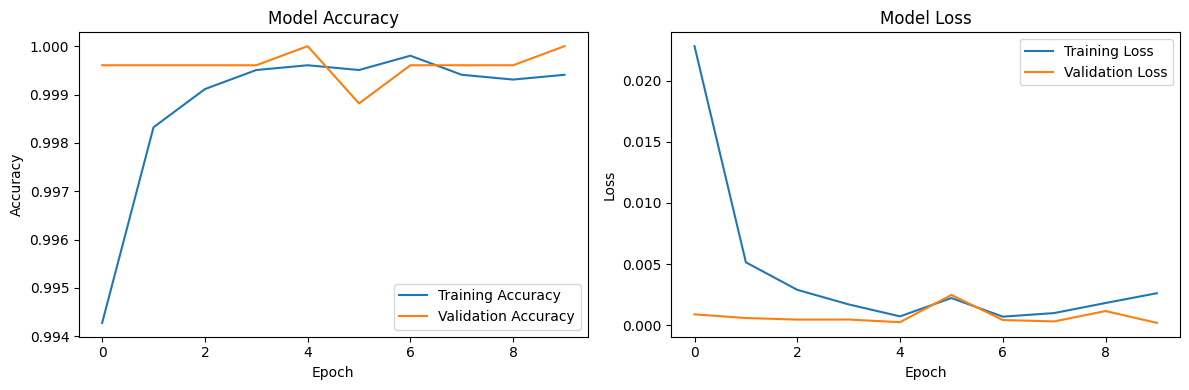

In [16]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [17]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(x_test_flat, y_test_filtered, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Make predictions
predictions = model.predict(x_test_flat)
predicted_classes = (predictions > 0.5).astype(int).flatten()

# Confusion matrix
cm = confusion_matrix(y_test_filtered, predicted_classes)
print("Confusion Matrix:")
print(cm)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test_filtered, predicted_classes))

Test Accuracy: 0.9995
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Confusion Matrix:
[[ 979    1]
 [   0 1135]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      1.00      1.00      1135

    accuracy                           1.00      2115
   macro avg       1.00      1.00      1.00      2115
weighted avg       1.00      1.00      1.00      2115



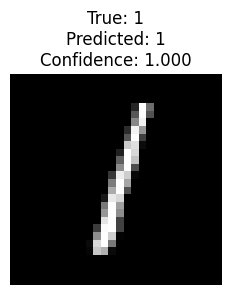

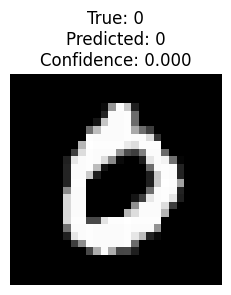

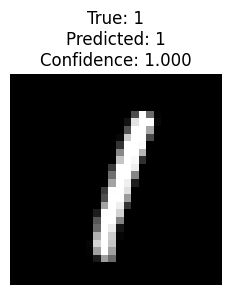

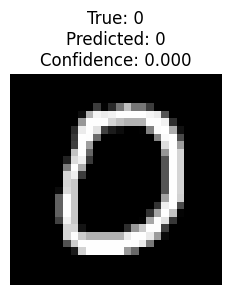

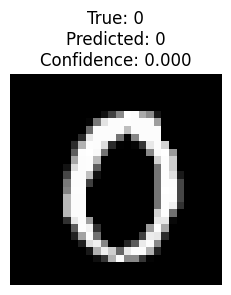

In [18]:
# Function to test individual predictions
def test_single_prediction(index):
    # Get the image and true label
    image = x_test_filtered[index]
    true_label = y_test_filtered[index]
    
    # Make prediction
    image_flat = image.reshape(1, -1) / 255.0
    prediction = model.predict(image_flat, verbose=0)[0][0]
    predicted_label = 1 if prediction > 0.5 else 0
    
    # Display results
    plt.figure(figsize=(6, 3))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'True: {true_label}\nPredicted: {predicted_label}\nConfidence: {prediction:.3f}')
    plt.axis('off')
    
    return predicted_label, prediction

# Test a few random samples
for i in range(5):
    test_single_prediction(i)
    plt.show()